# Analise das moleculas geradas

### RDKIT install and import

In [1]:
numero_moleculas_geradas = 3000

ModuleNotFoundError: No module named 'gt4sd.properties'

In [2]:
from IPython.display import display, Markdown, HTML, clear_output

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict

import chebi
import sys
sys.path.append('sascorer')
from sascorer import sascorer

from tqdm import tqdm
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit import DataStructs



/home/rodney/miniconda3/envs/gt4sd/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
smi_files = ['PolymerBlocks']
smi_file = smi_files[0]

In [4]:
dir = f'dados/{smi_file}_smiles.txt'
f = open(dir)
txt = f.read()
f.close()
smiles = txt.split('\n')[:3000]

### propriedades

In [5]:
gerados = pd.DataFrame(smiles,columns=['smiles'])

gerados['objeto'] = gerados['smiles'].apply(Chem.MolFromSmiles).apply(Chem.AddHs)
validos = gerados[ (gerados['objeto'].notnull()) ]
validos.reset_index(inplace=True,drop=True,)
# output.clear()

In [6]:
import numpy as np

def qed(mol):
    try:
        return Descriptors.qed(mol)
    except:
        return np.NaN
def sas(mol):
    try:
        return sascorer.calculateScore(mol)
    except:
        return np.NaN

In [7]:
unicos = pd.DataFrame(validos['smiles'].unique(),columns=['smiles'])
unicos['objeto'] = unicos['smiles'].apply(Chem.MolFromSmiles)

unicos['peso'] = unicos['objeto'].apply(Descriptors.MolWt)
unicos['area'] = unicos['objeto'].apply(Descriptors.TPSA)
unicos['solubilidade'] = unicos['objeto'].apply(Descriptors.MolLogP)
unicos['qed'] = unicos['objeto'].apply(qed)
unicos['sas'] = unicos['objeto'].apply(sas)
unicos['hba'] =  unicos['objeto'].apply(Chem.rdMolDescriptors.CalcNumLipinskiHBA)
unicos['hbd'] =  unicos['objeto'].apply(Chem.rdMolDescriptors.CalcNumLipinskiHBD)

unicos = unicos[['peso', 'area', 'solubilidade', 'qed','sas', 'hba','hbd','smiles','objeto']]

clear_output()

In [8]:
unicos

,peso,area,solubilidade,qed,sas,hba,hbd,smiles,objeto
0,326.173,61.83,2.46060,0.274646,3.202527,5,0,CC1(C(=O)Oc2c(F)c(F)c(F)c(F)c2F)COC(=O)OC1,<rdkit.Chem.rdchem.Mol object at 0x7feb45583e40>
1,331.337,24.06,1.84700,0.823104,2.976500,2,2,C=C(NC1=CC(C(F)(F)F)=C1)Nc1ccc(C(C)(C)C)cc1.[Na+],<rdkit.Chem.rdchem.Mol object at 0x7feb45583f80>
2,286.230,61.83,2.18110,0.796929,2.830841,5,0,CC1(C(=O)OCc2cccc(F)c2F)COC(=O)OC1,<rdkit.Chem.rdchem.Mol object at 0x7feb45583f30>
3,226.272,44.76,2.65600,0.410472,3.578800,4,0,C=C(C)C(=C)OCC1(CC)COC(=O)OC1,<rdkit.Chem.rdchem.Mol object at 0x7feb45572030>
4,288.206,0.00,5.09940,0.678754,2.346450,0,0,CC(C)c1cccc(C(F)(F)C(F)(F)C(F)(F)F)c1,<rdkit.Chem.rdchem.Mol object at 0x7feb45572080>
...,...,...,...,...,...,...,...,...,...
100,538.493,123.66,3.48282,0.135222,3.473669,10,0,CSCCCOC(=O)Oc1c(C)c(F)c(F)c(F)c1CC(=O)OCCOC(=O...,<rdkit.Chem.rdchem.Mol object at 0x7feb45584ee0>
101,270.376,32.67,3.71166,0.765318,3.005421,3,0,Cc1cc(C)c(N2C(=O)C=CC2=NC(C)(C)C)c(C)c1,<rdkit.Chem.rdchem.Mol object at 0x7feb45584f30>
102,361.570,41.49,5.61350,0.448464,3.645448,3,2,C=C(CCCCCC(C)C)NC(C)(CO)C(OC(C)C)c1ccccc1,<rdkit.Chem.rdchem.Mol object at 0x7feb45584f80>
103,234.242,17.07,3.34710,0.766535,3.291466,1,0,C=C(C)c1ccccc1S(=O)C(F)(F)F,<rdkit.Chem.rdchem.Mol object at 0x7feb45574030>


In [9]:
print(len(validos.index)/len(smiles)*100)
print(len(unicos.index)/len(smiles)*100)

100.0
88.98305084745762


In [10]:
unicos.dropna(inplace=True)
unicos.drop(['smiles','objeto'],axis=1)

,peso,area,solubilidade,qed,sas,hba,hbd
0,326.173,61.83,2.46060,0.274646,3.202527,5,0
1,331.337,24.06,1.84700,0.823104,2.976500,2,2
2,286.230,61.83,2.18110,0.796929,2.830841,5,0
3,226.272,44.76,2.65600,0.410472,3.578800,4,0
4,288.206,0.00,5.09940,0.678754,2.346450,0,0
...,...,...,...,...,...,...,...
99,280.276,71.06,2.51290,0.789092,2.686240,6,0
100,538.493,123.66,3.48282,0.135222,3.473669,10,0
101,270.376,32.67,3.71166,0.765318,3.005421,3,0
102,361.570,41.49,5.61350,0.448464,3.645448,3,2


In [11]:
len(unicos)

104

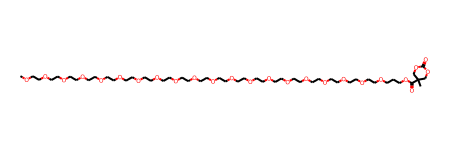

In [12]:
unicos.loc[39,'objeto']

In [13]:
validos.loc[66]

smiles    CC(C)(C)OC(=O)N=C(NCCOC(=O)C1(C)COC(=O)OC1)NC(...
objeto     <rdkit.Chem.rdchem.Mol object at 0x7feb45a3e580>
Name: 66, dtype: object

In [14]:
mol1 = validos.loc[2,'objeto']
mol2 = validos.loc[1,'objeto']

fp1 = Chem.RDKFingerprint(mol1)
fp2 = Chem.RDKFingerprint(mol2)

DataStructs.TanimotoSimilarity(fp1,fp2)

0.4719166184134337

In [15]:
def diversidade(A,B):
  '''parametros: duas listas/series de cadeias smiles sem a sinalização de inicio ou fim'''
  soma = 0
  for a in tqdm(A):
    fp1 = Chem.RDKFingerprint( Chem.MolFromSmiles(a) )
    for b in B:
      fp2 = Chem.RDKFingerprint( Chem.MolFromSmiles(b) )

      soma+= DataStructs.TanimotoSimilarity(fp1,fp2)
  return 1 - soma/(len(A)*len(B))

In [16]:
#diversidade(validos['smiles'],validos['smiles'])

In [17]:
# diversidade(unicos['smiles'].apply(tira),unicos['smiles'].apply(tira))

In [18]:
atributos = unicos.columns[:-2]
len(atributos)

7

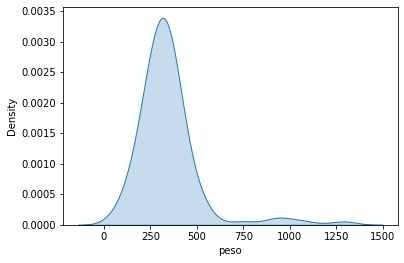

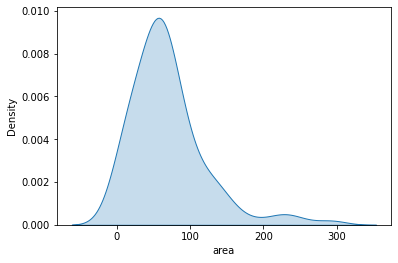

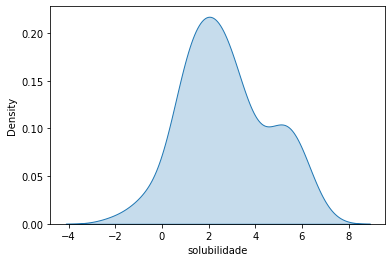

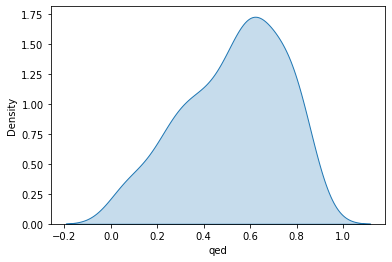

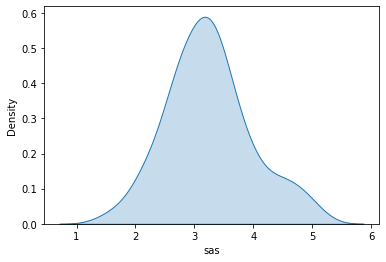

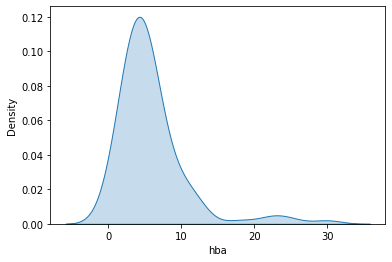

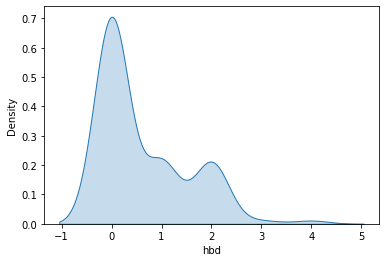

In [19]:
for col in atributos:
    sns.kdeplot(unicos[col],shade=True)
    plt.show()

In [20]:
%%time
faz_hierarquia = True
save_arff = False
save_obj = False#todo

try:
    chebi = Chebi()
    chebi = chebi.load('chebi.obj')
except:
    if faz_hierarquia:
        from chebi import Chebi
        chebi = Chebi('chebi.owl')
        chebi.create_hierarchy()
        chebi.poda_irregulares(100)
        if save_arff: chebi.save_arff('clus/chebi.arff')
        if save_obj: chebi.save('chebi.obj') 

        clear_output()

CPU times: user 1h 42min 52s, sys: 28 s, total: 1h 43min 20s
Wall time: 1h 43min


In [21]:
est = [chebi.faz_estatisticas(x) for x in chebi.raizes]

est

[{'profundidade': 17,
  'quantidade de nós': 278,
  'quantidade de folhas': 87,
  'maior numero de filhos': 12,
  'pai com maior numero de filhos': 'CHEBI_29067',
  'maior numero de pais': 6,
  'filho com maior numero de pais': 'CHEBI_29067',
  'média de filhos': 1.5611510791366907,
  'média de pais': 0},
 '',
 {'profundidade': 12,
  'quantidade de nós': 166,
  'quantidade de folhas': 75,
  'maior numero de filhos': 12,
  'pai com maior numero de filhos': 'CHEBI_33575',
  'maior numero de pais': 6,
  'filho com maior numero de pais': 'CHEBI_33575',
  'média de filhos': 1.1626506024096386,
  'média de pais': 0}]

In [22]:
conjunto = smi_file

In [23]:
conjunto = smi_file
base = 'chebi'

sfile = f"""
[Data]
File = {base}.arff
PruneSet = {base}.arff
TestSet = {conjunto}.arff

[Hierarchical]
Type = DAG
WType = ExpAvgParentWeight
HSeparator = /

[Tree]
FTest = [0.001,0.01,0.1,1.0]

[Model]
MinimalWeight = 1.0

[Output]
WritePredictions = {{Test}}

"""

file2write=open(f'clus/{conjunto}.s','w')
file2write.write(sfile)
file2write.close()

In [24]:
#cria o header
f = open('clus/chebi.arff')
texto = f.read()
f.close()
texto = texto.splitlines()



ala = np.where('@data' in texto)

for i,linha in enumerate(texto):
    linha+='\n'
    if '@data' in linha:        
        break

header_text = ''.join(texto[:i+1]).splitlines()[0].replace('@data', '\n@data\n')
header_text = header_text.replace('@','\n@')

f = open('clus/header.txt', 'w')
f.write(header_text)
f.close()

In [25]:
#cria o .arff alvo
f = open('clus/header.txt')
texto = f.read()
f.close()

for _,linha in unicos.drop(['smiles','objeto'],axis=1).iterrows():
    for atributo in linha:
        texto += f'{atributo}, '
    texto += 'CHEBI_24431\n'

file2write=open(f'clus/{conjunto}.arff','w')
file2write.write(texto)
file2write.close()

In [26]:
%%time
import time
clus = False
if clus:
    
    inicio = time.time()
    toy = f'{conjunto}.s'
    %cd clus
    !java -jar -Xmx16g Clus.jar -xval {toy}
    %cd ..
    fim = time.time()
    clear_output()

In [ ]:
fim - inicio    

In [55]:
saida = f"clus/{conjunto}.test.pred.arff"

f = open(saida)
texto = f.read().split('\n\n')
f.close()

_,labels,elements_preds = texto

labels = labels.split('\n')
labels = labels[1:-1]
numero_de_classes = len(labels) //2
labels = labels[numero_de_classes:] #o primeiro e ultimo  são a classe prevista e a suposta verdadeira
labels = [x.split('-')[2].split(' ')[0] for x in labels]

elements_preds = elements_preds.split('\n')
elements_preds = elements_preds[1:-1]
# preds = np.array( preds[1:-1] )

In [102]:
hierarquias_previstas = []
lb = np.array(labels)
for elemento in elements_preds:
    bins = elemento.split(',')[1:-1]
    probs = bins[numero_de_classes:]
    preds = bins[:numero_de_classes]
    
    mini = Chebi()
    clear_output()
    hierarquias_previstas.append(mini)
    
    probs = np.array([float(x) for x in probs])
    labels_do_elemento = lb[ np.where(probs >= .8)[0]]
    # for a,b in zip(probs,preds): print(a,b)
    for node in labels_do_elemento:
        mini.add_node(node)
        filhos = chebi.filhos[node]
        for filho in filhos: 
            if filho in labels_do_elemento:
                mini.add_edge(node,filho)

In [103]:
len(hierarquias_previstas)

104

In [100]:
for node in hierarquias_previstas[0].raizes:
    hierarquias_previstas[0].printa(node)

├CHEBI_24431
| ├CHEBI_23367
| | ├CHEBI_24870
| | | ├CHEBI_22563
| | | | ├CHEBI_25696
| | | | | ├CHEBI_29067
| | | | | | ├CHEBI_25384
| | | | ├CHEBI_33273
| | | | | ├CHEBI_35406
| | | ├CHEBI_25699
| | | ├CHEBI_36358
| | ├CHEBI_33579
| | | ├CHEBI_33674
| | | | ├CHEBI_33608
| | | | | ├CHEBI_24651
| | | | | | ├CHEBI_24833
| | | | | | | ├CHEBI_35605
| | | | | | | | ├CHEBI_33575
| | | ├CHEBI_33675
| | | | ├CHEBI_33304
| | | | | ├CHEBI_25806
| | | | | | ├CHEBI_25741
| | | | | | ├CHEBI_36963
| | | | | | | ├CHEBI_36586
| | | | | ├CHEBI_36962
| | | | ├CHEBI_33582
| | | | | ├CHEBI_50860
| | | | | | ├CHEBI_33285
| | | | | | ├CHEBI_64709
| | | | | | ├CHEBI_72695
| | | | | | | ├CHEBI_36587
| | ├CHEBI_36357
| | | ├CHEBI_25367
| | | ├CHEBI_37577
├CHEBI_36342
├CHEBI_50906
| ├CHEBI_51086
| | ├CHEBI_17891
| | | ├CHEBI_39141
| | ├CHEBI_37527


In [70]:
mini.atualizado = defaultdict(lambda:False)

for node in mini.raizes: 
    if node in mini.nodes: mini.printa(node)


├CHEBI_24431


In [40]:
#split folds
if 'fold' in 
pos = []
folds = []
fold = []
for i,txt in enumerate(elements_preds):
    fold.append(txt)
    if '!' in txt and i>2:
        folds.append(fold)
        fold = []
    elif '!' in txt:
            fold.pop()

    if '@DATA' in txt :
        fold.pop()

    for a in range(len(pos)-1):
        print(pos[a+1]-pos[a])

In [77]:
import pickle
import dill
file_name = 'mini.obj'
# file = open(file_name,'w')
# pickle.dumps(mini.__dict__,file)
# file.close()

with open(file_name, 'wb') as file:  # Overwrites any existing file.
    a = dill.dump(mini, file, pickle.HIGHEST_PROTOCOL)

# with open(file_name, 'r') as file:  # Overwrites any existing file.
#     mini2 = dill.loads(file, pickle.HIGHEST_PROTOCOL)

print(a)
# import pickle
# object = Object()
# filehandler = open(filename, 'w')
# pickle.dump(object, filehandler)

None


In [50]:
elemento = folds[0][3].split(',')

In [51]:
bins = elemento[1:-1]
porbs = bins[numero_de_classes:]
preds = bins[:numero_de_classes]

In [78]:
len(bins)

744

In [54]:
mini = Chebi()

não foi possivel abrir o aqrquivo  


In [55]:
for node in labels_do_elemento:
    mini.add_node(node)
    filhos = chebi.filhos[node]
    for filho in filhos: 
        if filho in labels_do_elemento:
            mini.add_edge(node,filho)


In [58]:
est = [mini.faz_estatisticas(x) for x in mini.raizes]    


In [61]:
def printa(chebi,node,nivel=0):
        if chebi.atualizado[node]:
            return
        chebi.atualizado[node] = True
        print(f"{'| '*nivel}├{node}")
        for filho in chebi.filhos[node]:
            printa(chebi,filho,nivel=nivel+1)

In [82]:
mini.atualizado = defaultdict(lambda:False)

for node in mini.raizes: 
    if node in mini.nodes: printa(mini,node)
    # pass

├CHEBI_24431
| ├CHEBI_23367
| | ├CHEBI_33579
| | | ├CHEBI_33674
| | | | ├CHEBI_33608
| | | | | ├CHEBI_24651
| | | | | | ├CHEBI_33822
| | | | | | | ├CHEBI_30879
| | | | | | | | ├CHEBI_35681
| | | | | | | | ├CHEBI_26878
| | | ├CHEBI_33675
| | | | ├CHEBI_33304
| | | | | ├CHEBI_25806
| | | | | | ├CHEBI_36963
| | | | | | | ├CHEBI_35701
| | | | | | | | ├CHEBI_25000
| | | | | | | | | ├CHEBI_18946
| | | | | | | | ├CHEBI_33308
| | | | | | | ├CHEBI_36586
| | | | | | | | ├CHEBI_17087
| | | | | | | | | ├CHEBI_51721
| | | | | | | | | | ├CHEBI_51689
| | | | | | | ├CHEBI_38104
| | | | | ├CHEBI_36962
| | | | ├CHEBI_33582
| | | | | ├CHEBI_50860
| | | | | | ├CHEBI_33285
| | | | | | | ├CHEBI_24532
| | | | | | ├CHEBI_72695
| | | | | | | ├CHEBI_33832
| | | | | | | ├CHEBI_36587
| | | | | | ├CHEBI_78840
| | ├CHEBI_36357
| | | ├CHEBI_25367
| | | | ├CHEBI_33595
| | | | | ├CHEBI_5686
| | | ├CHEBI_37577
├CHEBI_50906
| ├CHEBI_33232
| | ├CHEBI_52217
| | | ├CHEBI_23888
| | | | ├CHEBI_35610


In [ ]:
print(len(chebi.nodes))
print(len(chebi.folhas))

In [ ]:
classes = []
for label in labels:
    classes.append(label.split('-')[2].split()[0])
print(classes[:3])

`classes:` classes possiveis, extraidas do header

In [ ]:
all_preds = []

for pred in preds:
    probs = pred.split(',')[1:-1][numero_de_classes:]
    # print(pred.split(',')[1:-1][numero_de_classes:])
    pred_text = []
    for num,text in zip (probs,classes):
        # print(num, text)
        if float(num) > .8:
            pred_text.append(text)
    all_preds.append(pred_text)

In [ ]:
len(classes)

In [ ]:

classes = []
for pred in preds:
    classes.append(pred.split(',')[0])
    print(pred.split(',')[1:-1][454//2:])


In [ ]:
classes.count('CHEBI_78298')

In [ ]:
arquivos = ["hierarchy.txt", f"{conjunto}.arff", f"{conjunto}.s", f"{conjunto}.xval", f"{conjunto}.model", f"{conjunto}.model", f"{conjunto}.out", f"{conjunto}.test.pred.arff"]

In [ ]:
delete_out = False
if delete_out:
    for arquivo in arquivos:
        if os.path.exists(f"clus/{arquivo}"):
            os.remove(f"clus/{arquivo}")